In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from StringIO import StringIO 
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 12.0) 


In [2]:
#define the column start and end points
cols=[(0,4),(5,9),(10,15),(16,24),(25,32),(33,41),(42,49),(50,57),(58,64),(65,72),(73,74),(75,76),(77,85),(86,88)]
cols+=[(89,92),(93,112),(113,118),(119,124),(125,130),(131,136),(137,142),(143,148),(149,154),(155,160),(161,166)]
cols+=[(167,172),(173,179),(180,186)]

#read in the data
data=pd.read_fwf("virgo_data.txt",colspecs=cols,skiprows=57,header=None)

#rename the columns
data.rename(columns={0:'idEVC',1:'idVC',2:'ngc',3:'RAdeg',4:'DEdeg',5:'FRAdeg',6:'FDEdeg',7:'Offset'},inplace=True)
data.rename(columns={8:'SRvel',9:'NRvel',10:'memIn',11:'memVC',12:'pmorph',13:'smorph',14:'nmorph'},inplace=True)
data.rename(columns={15:'vmorph',16:'umag',17:'eumag',18:'gmag',19:'egmag',20:'rmag',21:'ermag'},inplace=True)
data.rename(columns={22:'imag',23:'eimag',24:'zmag',25:'ezmag',26:'rad',27:'r50'},inplace=True)


In [20]:
def defineCenter():
    '''
    Get the center of the cluster, currently taken from NED.
    '''
    return np.array([187.69708,12.33694])

def getDistances(data,center,kpcPerDeg):
    '''
    Returns distances for the individual galaxies from the cluster center in kpc 
    using the haversine formula.
    
    INPUTS:
        - a pandas array with ['RAdeg'] and ['DEdeg'] columns for the galaxy positions.
        - a numpy array with RA and DEC of the cluster
        - conversion factor between kiloparsecs and degrees
    
    RETURNS:
        - a numpy array with distances
    '''

    dRA = np.radians(data['RAdeg']-center[0])
    dDE = np.radians(data['DEdeg']-center[1])
    a = np.power(np.sin(dDE/2),2.) + np.cos(np.radians(data['DEdeg'])) \
        *np.cos(np.radians(center[1]))*np.power(np.sin(dRA/2),2.)
        
    return kpcPerDeg*np.degrees(2*np.arcsin(np.sqrt(a)))


In [21]:
print data.shape
data.describe()

(1589, 28)


,idEVC,idVC,RAdeg,DEdeg,FRAdeg,FDEdeg,Offset,SRvel,NRvel,nmorph,...,gmag,egmag,rmag,ermag,imag,eimag,zmag,ezmag,rad,r50
count,1589.000000,913.000000,1589.000000,1589.000000,1324.000000,1324.000000,1324.000000,1324.000000,1153.000000,1589.000000,...,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,907.570799,1030.464403,187.193104,9.262071,187.161304,9.764634,2.767591,1392.231949,1473.727754,303.557583,...,15.565721,0.021313,15.069717,0.021446,14.771938,0.021534,14.643656,0.038633,52.583902,12.938320
std,650.409924,605.943826,4.206295,6.105173,4.152023,5.956675,7.438201,764.773385,2969.529847,89.822866,...,1.979145,0.017085,2.055478,0.009658,2.097612,0.010262,2.161827,0.057276,47.720349,10.503226
min,1.000000,1.000000,175.077100,-4.579600,175.077100,-3.682400,0.000000,-745.000000,-730.500000,100.000000,...,8.980000,0.020000,8.280000,0.020000,7.840000,0.020000,7.600000,0.031000,4.980000,0.850000
25%,398.000000,491.000000,184.841100,5.283700,184.813425,5.765700,0.241400,902.325000,894.300000,207.000000,...,14.370000,0.020000,13.870000,0.020000,13.570000,0.020000,13.380000,0.031000,24.050000,6.270000
50%,795.000000,1011.000000,186.942900,9.879000,186.870550,10.344800,0.652500,1310.250000,1306.800000,300.000000,...,15.940000,0.021000,15.460000,0.021000,15.140000,0.021000,15.000000,0.032000,38.600000,10.160000
75%,1192.000000,1554.000000,189.830300,13.322500,189.799550,13.581700,1.808575,1988.675000,1972.500000,401.000000,...,17.120000,0.021000,16.700000,0.021000,16.400000,0.021000,16.320000,0.036000,63.910000,16.280000
max,2264.000000,2095.000000,199.589000,24.921000,199.531600,24.923000,86.492300,2982.400000,98609.100000,411.000000,...,20.630000,0.653000,20.560000,0.346000,19.670000,0.327000,19.620000,1.621000,476.730000,101.240000


In [40]:
dataNoNaN=data.dropna(subset=['SRvel'])
dataNoNaN.shape

(1324, 28)

In [41]:
dataM=dataNoNaN.loc[dataNoNaN['memIn'].isin(['M'])]

In [42]:
virgoDataM=pd.DataFrame(data={'r':getDistances(dataM,defineCenter(),266.4),\
                             'vobs':dataM['SRvel']})

In [43]:
virgoData=pd.DataFrame(data={'r':getDistances(dataNoNaN,defineCenter(),266.4),\
                             'vobs':dataNoNaN['SRvel']})

In [45]:
virgoDataM.to_csv('virgoDataMembers.csv')
virgoData.to_csv('virgoData.csv')

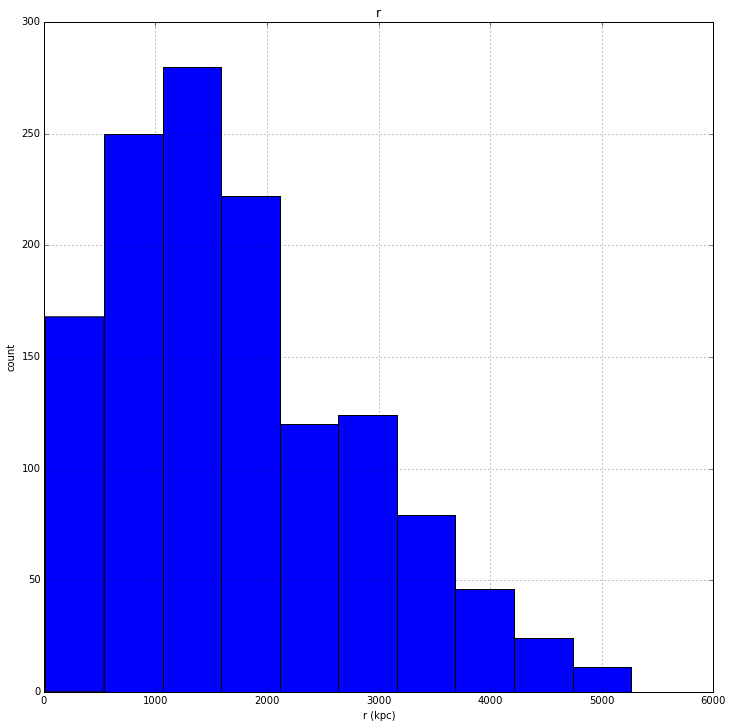

In [28]:
virgoData.hist(['r'])
plt.xlabel('r (kpc)')
plt.ylabel('count')